In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [2]:
df_fish = pd.read_excel('Monir_MI_GillnetTrawl.xlsx', sheet_name=0)

In [3]:
df_fish.shape

(14971, 34)

In [4]:
df_fish.columns

Index(['1a_Main Net Data_YR', 'ID_NUMBER', 'Date', 'C_BASIN', 'CAP_SITE',
       'C_GRID', 'SITEDPT1', 'SITEDPT2', 'GEAR_TYPE', 'LAT_DEG_1', 'LAT_MIN_1',
       'LONG_DEG_1', 'LONG_MIN_1', 'LAT_DEG_2', 'LAT_MIN_2', 'LONG_DEG_2',
       'LONG_MIN_2', 'FISHDPT1', 'FISHDPT2', 'WIDTH', 'LENGTH', 'MINMESH',
       'MAXMESH', 'BEGTIME', 'ENDTIME', 'BEGTIME_2', 'ENDTIME_2',
       'Step1_biodatasummary_YR', 'ID', 'Spp', 'DESCRIPTION', 'SumOfN',
       'AvgOfTL', 'SumOfWT'],
      dtype='object')

In [5]:
df_fish.head()

,1a_Main Net Data_YR,ID_NUMBER,Date,C_BASIN,CAP_SITE,C_GRID,SITEDPT1,SITEDPT2,GEAR_TYPE,LAT_DEG_1,LAT_MIN_1,LONG_DEG_1,LONG_MIN_1,LAT_DEG_2,LAT_MIN_2,LONG_DEG_2,LONG_MIN_2,FISHDPT1,FISHDPT2,WIDTH,LENGTH,MINMESH,MAXMESH,BEGTIME,ENDTIME,BEGTIME_2,ENDTIME_2,Step1_biodatasummary_YR,ID,Spp,DESCRIPTION,SumOfN,AvgOfTL,SumOfWT
0,1965,4,1965-09-17,MI,GRAND TRAVERSE-EAST BAY,NaN,NaN,NaN,BGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.25,NaN,NaN,NaN,NaN,NaN,1965,4,BKT,BROOK TROUT,1.0,292.100,NaN
1,1965,4,1965-09-17,MI,GRAND TRAVERSE-EAST BAY,NaN,NaN,NaN,BGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.25,NaN,NaN,NaN,NaN,NaN,1965,4,YEP,YELLOW PERCH,10.0,297.942,NaN
2,1965,4,1965-09-17,MI,GRAND TRAVERSE-EAST BAY,NaN,NaN,NaN,BGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.25,NaN,NaN,NaN,NaN,NaN,1965,4,WAE,WALLEYE,1.0,452.120,NaN
3,1965,4,1965-09-17,MI,GRAND TRAVERSE-EAST BAY,NaN,NaN,NaN,BGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.25,NaN,NaN,NaN,NaN,NaN,1965,4,LWF,LAKE WHITEFISH,3.0,485.140,NaN
4,1965,4,1965-09-17,MI,GRAND TRAVERSE-EAST BAY,NaN,NaN,NaN,BGN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,0.25,NaN,NaN,NaN,NaN,NaN,1965,4,BNT,BROWN TROUT,1.0,601.980,2267.961549


#### How many unique Gear types

In [6]:
df_fish.GEAR_TYPE.unique()

array(['BGN', 'BTL', 'SGN', 'MWT', 'SPN', 'VGN'], dtype=object)

#### Change long column name '1a_Main Net Data_YR' to 'YR'

In [7]:
df_fish = df_fish.rename(columns={'1a_Main Net Data_YR':'YR'})

In [8]:
df_fish.columns

Index(['YR', 'ID_NUMBER', 'Date', 'C_BASIN', 'CAP_SITE', 'C_GRID', 'SITEDPT1',
       'SITEDPT2', 'GEAR_TYPE', 'LAT_DEG_1', 'LAT_MIN_1', 'LONG_DEG_1',
       'LONG_MIN_1', 'LAT_DEG_2', 'LAT_MIN_2', 'LONG_DEG_2', 'LONG_MIN_2',
       'FISHDPT1', 'FISHDPT2', 'WIDTH', 'LENGTH', 'MINMESH', 'MAXMESH',
       'BEGTIME', 'ENDTIME', 'BEGTIME_2', 'ENDTIME_2',
       'Step1_biodatasummary_YR', 'ID', 'Spp', 'DESCRIPTION', 'SumOfN',
       'AvgOfTL', 'SumOfWT'],
      dtype='object')

#### Convert units of depth from 'feet' to 'm'  

In [9]:
df_fish['SITEDPT1']=df_fish['SITEDPT1']*0.3048

In [10]:
df_fish['SITEDPT2']=df_fish['SITEDPT2']*0.3048

#### Disect the dataframe into two dataframes: nearshore (SITEDPT2 <= 30) and offshore (SITEDPT1 >=30)

In [11]:
df_fish_nearshore = df_fish[df_fish.SITEDPT2 <= 30]

In [12]:
df_fish_nearshore.shape

(8446, 34)

In [13]:
# df_fish_nearshore = df_fish_nearshore.reset_index(inplace=True)

In [14]:
type(df_fish_nearshore)

pandas.core.frame.DataFrame

In [15]:
df_fish_offshore = df_fish[df_fish.SITEDPT1 >= 30]

In [16]:
df_fish_offshore.shape

(3935, 34)

In [17]:
df_fish_offshore = df_fish_offshore.reset_index()

In [18]:
df_fish_offshore.head(3)

,index,YR,ID_NUMBER,Date,C_BASIN,CAP_SITE,C_GRID,SITEDPT1,SITEDPT2,GEAR_TYPE,LAT_DEG_1,LAT_MIN_1,LONG_DEG_1,LONG_MIN_1,LAT_DEG_2,LAT_MIN_2,LONG_DEG_2,LONG_MIN_2,FISHDPT1,FISHDPT2,WIDTH,LENGTH,MINMESH,MAXMESH,BEGTIME,ENDTIME,BEGTIME_2,ENDTIME_2,Step1_biodatasummary_YR,ID,Spp,DESCRIPTION,SumOfN,AvgOfTL,SumOfWT
0,358,1967,72,1967-05-23,MI,GRAND TRAVERSE,815.0,32.9184,56.6928,BGN,44.0,51.3,85.0,32.2,NaN,NaN,NaN,NaN,108.0,186.0,NaN,300.0,2.5,4.0,1967-05-23 14:00:00,1967-05-24 10:30:00,NaN,NaN,1967,72,LAT,LAKE TROUT,12.0,383.116667,6917.282724
1,359,1967,72,1967-05-23,MI,GRAND TRAVERSE,815.0,32.9184,56.6928,BGN,44.0,51.3,85.0,32.2,NaN,NaN,NaN,NaN,108.0,186.0,NaN,300.0,2.5,4.0,1967-05-23 14:00:00,1967-05-24 10:30:00,NaN,NaN,1967,72,LHR,LAKE HERRING,3.0,287.866667,623.689426
2,360,1967,72,1967-05-23,MI,GRAND TRAVERSE,815.0,32.9184,56.6928,BGN,44.0,51.3,85.0,32.2,NaN,NaN,NaN,NaN,108.0,186.0,NaN,300.0,2.5,4.0,1967-05-23 14:00:00,1967-05-24 10:30:00,NaN,NaN,1967,72,SMT,RAINBOW SMELT,11.0,185.189091,NaN


In [19]:
df_fish_offshore.index

RangeIndex(start=0, stop=3935, step=1)

In [20]:
df_fish_offshore.columns

Index(['index', 'YR', 'ID_NUMBER', 'Date', 'C_BASIN', 'CAP_SITE', 'C_GRID',
       'SITEDPT1', 'SITEDPT2', 'GEAR_TYPE', 'LAT_DEG_1', 'LAT_MIN_1',
       'LONG_DEG_1', 'LONG_MIN_1', 'LAT_DEG_2', 'LAT_MIN_2', 'LONG_DEG_2',
       'LONG_MIN_2', 'FISHDPT1', 'FISHDPT2', 'WIDTH', 'LENGTH', 'MINMESH',
       'MAXMESH', 'BEGTIME', 'ENDTIME', 'BEGTIME_2', 'ENDTIME_2',
       'Step1_biodatasummary_YR', 'ID', 'Spp', 'DESCRIPTION', 'SumOfN',
       'AvgOfTL', 'SumOfWT'],
      dtype='object')

In [21]:
# df_fish_offshore = df_fish_offshore.drop(columns='index')

In [22]:
# df_fish_offshore.head(3)

,YR,ID_NUMBER,Date,C_BASIN,CAP_SITE,C_GRID,SITEDPT1,SITEDPT2,GEAR_TYPE,LAT_DEG_1,LAT_MIN_1,LONG_DEG_1,LONG_MIN_1,LAT_DEG_2,LAT_MIN_2,LONG_DEG_2,LONG_MIN_2,FISHDPT1,FISHDPT2,WIDTH,LENGTH,MINMESH,MAXMESH,BEGTIME,ENDTIME,BEGTIME_2,ENDTIME_2,Step1_biodatasummary_YR,ID,Spp,DESCRIPTION,SumOfN,AvgOfTL,SumOfWT
0,1967,72,1967-05-23,MI,GRAND TRAVERSE,815.0,32.9184,56.6928,BGN,44.0,51.3,85.0,32.2,NaN,NaN,NaN,NaN,108.0,186.0,NaN,300.0,2.5,4.0,1967-05-23 14:00:00,1967-05-24 10:30:00,NaN,NaN,1967,72,LAT,LAKE TROUT,12.0,383.116667,6917.282724
1,1967,72,1967-05-23,MI,GRAND TRAVERSE,815.0,32.9184,56.6928,BGN,44.0,51.3,85.0,32.2,NaN,NaN,NaN,NaN,108.0,186.0,NaN,300.0,2.5,4.0,1967-05-23 14:00:00,1967-05-24 10:30:00,NaN,NaN,1967,72,LHR,LAKE HERRING,3.0,287.866667,623.689426
2,1967,72,1967-05-23,MI,GRAND TRAVERSE,815.0,32.9184,56.6928,BGN,44.0,51.3,85.0,32.2,NaN,NaN,NaN,NaN,108.0,186.0,NaN,300.0,2.5,4.0,1967-05-23 14:00:00,1967-05-24 10:30:00,NaN,NaN,1967,72,SMT,RAINBOW SMELT,11.0,185.189091,NaN


#### List of all nershore sites. There are 51 nearshore sites

In [24]:
df_fish_nearshore.CAP_SITE.nunique()

51

In [25]:
df_fish_nearshore.CAP_SITE.unique() # names of all 51 nearshore sites

array(['CHARLEVOIX', 'BEAVER ISLAND', 'GULL ISLAND SHOAL',
       "RICHARD'S REEF", 'BOULDER REEF', 'GRAND TRAVERSE', 'ELK RAPIDS',
       'GRAND TRAVERSE-EAST BAY', 'ST. JOSEPH', 'MANISTEE', 'LUDINGTON',
       'PENTWATER', 'MANISTIQUE', 'MICHIGAN CITY', 'MANITOWOC',
       'MUSKEGON', 'SAUGATUCK', 'WHITE LAKE', 'BIG REEF', 'ARCADIA',
       'FRANKFORT', 'PORT SHELDON', 'SOUTH HAVEN', 'GRAND HAVEN',
       'FOX ISLANDS', 'FISHERMANS ISLAND', 'GOODHART', 'ILE AUX GALETS',
       'DAHLIA SHOAL', 'HOLLAND', 'LELAND', 'POINT SABLE', 'ONEKAMA',
       'SOUTH FOX ISLAND', 'NORTH FOX ISLAND', 'IRISHMANS',
       'MIDDLE GROUND', 'LITTLE TRAVERSE BAY', 'WHITEHALL/MONTAGUE',
       'SLEEPING BEAR DUNES', 'CATHEAD', 'PETOSKEY', 'ELK RAPIDS-POINT',
       'ELK RAPIDS-REEF', 'ELK RAPIDS-DOCK', 'INGALLS POINT',
       'BAY HARBOR', 'PORTAGE LAKE', 'PLATTE BAY', 'HOG ISLAND REEF',
       'CONNS POINT, BEAVER ISLAND'], dtype=object)

#### Nearshore: Number of obseravtions: CAP_SITE for each GEAR_TYPE 

In [26]:
gear_wise_cites = df_fish_nearshore.groupby(['GEAR_TYPE'])['CAP_SITE'].value_counts()

In [27]:
print(gear_wise_cites)

GEAR_TYPE  CAP_SITE           
BGN        GRAND HAVEN            689
           SOUTH HAVEN            623
           SAUGATUCK              578
           ARCADIA                384
           ELK RAPIDS             259
           LELAND                 248
           CHARLEVOIX             244
           ST. JOSEPH             221
           ELK RAPIDS-REEF         74
           FISHERMANS ISLAND       73
           ELK RAPIDS-DOCK         72
           ELK RAPIDS-POINT        72
           PETOSKEY                65
           PENTWATER               56
           GRAND TRAVERSE          54
           LITTLE TRAVERSE BAY     48
           INGALLS POINT           45
           FRANKFORT               42
           BAY HARBOR              35
           MANISTIQUE              27
           BEAVER ISLAND           25
           BIG REEF                22
           LUDINGTON               22
           FOX ISLANDS             21
           SOUTH FOX ISLAND        19
           BOULDER 

In [28]:
df_gear_cite_wise = gear_wise_cites.unstack().fillna(0)

#### Following dataframe shows GEAR_TYPE in rows and "number of observations" for each CAP_SITE in cloumns

In [29]:
df_gear_cite_wise.head()

CAP_SITE,ARCADIA,BAY HARBOR,BEAVER ISLAND,BIG REEF,BOULDER REEF,CATHEAD,CHARLEVOIX,"CONNS POINT, BEAVER ISLAND",DAHLIA SHOAL,ELK RAPIDS,ELK RAPIDS-DOCK,ELK RAPIDS-POINT,ELK RAPIDS-REEF,FISHERMANS ISLAND,FOX ISLANDS,FRANKFORT,GOODHART,GRAND HAVEN,GRAND TRAVERSE,GRAND TRAVERSE-EAST BAY,GULL ISLAND SHOAL,HOG ISLAND REEF,HOLLAND,ILE AUX GALETS,INGALLS POINT,IRISHMANS,LELAND,LITTLE TRAVERSE BAY,LUDINGTON,MANISTEE,MANISTIQUE,MANITOWOC,MICHIGAN CITY,MIDDLE GROUND,MUSKEGON,NORTH FOX ISLAND,ONEKAMA,PENTWATER,PETOSKEY,PLATTE BAY,POINT SABLE,PORT SHELDON,PORTAGE LAKE,RICHARD'S REEF,SAUGATUCK,SLEEPING BEAR DUNES,SOUTH FOX ISLAND,SOUTH HAVEN,ST. JOSEPH,WHITE LAKE,WHITEHALL/MONTAGUE
GEAR_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BGN,384.0,35.0,25.0,22.0,17.0,0.0,244.0,6.0,8.0,259.0,72.0,72.0,74.0,73.0,21.0,42.0,0.0,689.0,54.0,4.0,13.0,6.0,5.0,2.0,45.0,5.0,248.0,48.0,22.0,13.0,27.0,0.0,0.0,8.0,0.0,12.0,0.0,56.0,65.0,0.0,0.0,0.0,12.0,13.0,578.0,0.0,19.0,623.0,221.0,0.0,0.0
BTL,1.0,0.0,0.0,0.0,0.0,0.0,141.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,938.0,382.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,933.0,0.0,0.0,0.0
MWT,1.0,0.0,2.0,0.0,0.0,7.0,15.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,12.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,3.0,3.0,7.0,2.0,4.0,0.0,6.0,0.0,0.0,96.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,15.0,13.0,0.0,6.0
SGN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,26.0,0.0,0.0,3.0,0.0,0.0,0.0,41.0,0.0,0.0,43.0,75.0,3.0,0.0
SPN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,8.0,26.0,0.0,0.0


#### We take those sites that have more than 200 obseravtions

In [30]:
df_cite_gear_wise = df_gear_cite_wise.T

In [31]:
df_cite_gear_wise.head(3)

GEAR_TYPE,BGN,BTL,MWT,SGN,SPN,VGN
CAP_SITE,,,,,,
ARCADIA,384.0,1.0,1.0,2.0,0.0,0.0
BAY HARBOR,35.0,0.0,0.0,0.0,0.0,0.0
BEAVER ISLAND,25.0,0.0,2.0,0.0,0.0,0.0


In [32]:
df_nearshore_more_than_200_obseravtions = df_cite_gear_wise[df_cite_gear_wise>=200].dropna(axis=0, how='all').fillna(0)

#### We find only 10 nearshore cites that have more than or equal to 200 obseravtions

In [33]:
df_nearshore_more_than_200_obseravtions.shape

(10, 6)

In [34]:
df_nearshore_more_than_200_obseravtions

GEAR_TYPE,BGN,BTL,MWT,SGN,SPN,VGN
CAP_SITE,,,,,,
ARCADIA,384.0,0.0,0.0,0.0,0.0,0.0
CHARLEVOIX,244.0,0.0,0.0,0.0,0.0,0.0
ELK RAPIDS,259.0,0.0,0.0,0.0,0.0,0.0
GRAND HAVEN,689.0,1159.0,0.0,0.0,0.0,0.0
LELAND,248.0,0.0,0.0,0.0,0.0,0.0
PENTWATER,0.0,938.0,0.0,0.0,0.0,0.0
PETOSKEY,0.0,382.0,0.0,0.0,0.0,0.0
SAUGATUCK,578.0,0.0,0.0,0.0,0.0,0.0
SOUTH HAVEN,623.0,933.0,0.0,0.0,0.0,0.0


### nearshore fish biomass:  Year, Gear type and Site-wise sum of "SumOfWT"

In [35]:
df_fish_nearshore.groupby(['YR','GEAR_TYPE', 'CAP_SITE'])['SumOfWT'].sum()

YR    GEAR_TYPE  CAP_SITE               
1967  BGN        BEAVER ISLAND               65442.030489
                 BOULDER REEF                 7427.574072
                 CHARLEVOIX                 107275.333734
                 ELK RAPIDS                  20950.294807
                 GRAND TRAVERSE             170295.562746
                 GRAND TRAVERSE-EAST BAY    106650.891830
                 GULL ISLAND SHOAL            5443.107717
                 LUDINGTON                    9253.283119
                 MANISTEE                     6894.603108
                 RICHARD'S REEF               7654.370227
      SGN        ST. JOSEPH                   1451.495391
1992  BTL        PENTWATER                  464225.000000
      MWT        MANISTIQUE                   3106.000000
                 MICHIGAN CITY                 373.000000
                 PENTWATER                  108213.000000
      SGN        PENTWATER                   92065.000000
      SPN        PENTWATER     

In [36]:
# NS stands for nearshore

#### Wrtie a function to automate the separation of df by gear and cite type

In [37]:
def form_df(df, gear_type=None, cite=None):
    df_gear = df[df.GEAR_TYPE == gear_type]
    df_gear_cite = df_gear[df_gear.CAP_SITE == cite]
    return df_gear, df_gear_cite

In [38]:
df_BGN_NS, df_BGN_SOUTH_HAVEN_NS = form_df(df=df_fish_nearshore, gear_type='BGN', cite='SOUTH HAVEN')

In [39]:
df_BGN_NS.shape, df_BGN_SOUTH_HAVEN_NS.shape

((4142, 34), (623, 34))

In [40]:
df_BGN_SOUTH_HAVEN_NS.head()

,YR,ID_NUMBER,Date,C_BASIN,CAP_SITE,C_GRID,SITEDPT1,SITEDPT2,GEAR_TYPE,LAT_DEG_1,LAT_MIN_1,LONG_DEG_1,LONG_MIN_1,LAT_DEG_2,LAT_MIN_2,LONG_DEG_2,LONG_MIN_2,FISHDPT1,FISHDPT2,WIDTH,LENGTH,MINMESH,MAXMESH,BEGTIME,ENDTIME,BEGTIME_2,ENDTIME_2,Step1_biodatasummary_YR,ID,Spp,DESCRIPTION,SumOfN,AvgOfTL,SumOfWT
1893,1995,2019,1995-04-25,MI,SOUTH HAVEN,2311.0,15.2400,15.2400,BGN,42.0,25.47186,86.0,17.98362,42.0,25.1745,86.0,18.35928,50.0,50.0,6.0,2400.0,2.0,3.5,1995-04-25 18:07:00,1995-04-25 18:30:00,NaN,NaN,1995,2019,YEP,YELLOW PERCH,1929.0,242.613054,725748.0
1929,1996,1009,1996-04-23,MI,SOUTH HAVEN,2311.0,10.0584,12.4968,BGN,42.0,25.00728,86.0,17.41296,NaN,NaN,NaN,NaN,33.0,39.0,6.0,1100.0,1.0,3.5,1996-04-23 19:30:00,1996-04-24 07:33:00,NaN,NaN,1996,1009,CWS,COMMON WHITE SUCKER,1.0,NaN,390.0
1930,1996,1009,1996-04-23,MI,SOUTH HAVEN,2311.0,10.0584,12.4968,BGN,42.0,25.00728,86.0,17.41296,NaN,NaN,NaN,NaN,33.0,39.0,6.0,1100.0,1.0,3.5,1996-04-23 19:30:00,1996-04-24 07:33:00,NaN,NaN,1996,1009,ALE,ALEWIFE,NaN,NaN,61960.0
1931,1996,1009,1996-04-23,MI,SOUTH HAVEN,2311.0,10.0584,12.4968,BGN,42.0,25.00728,86.0,17.41296,NaN,NaN,NaN,NaN,33.0,39.0,6.0,1100.0,1.0,3.5,1996-04-23 19:30:00,1996-04-24 07:33:00,NaN,NaN,1996,1009,RHS,REDHORSE (GENERAL),4.0,NaN,3185.0
1932,1996,1009,1996-04-23,MI,SOUTH HAVEN,2311.0,10.0584,12.4968,BGN,42.0,25.00728,86.0,17.41296,NaN,NaN,NaN,NaN,33.0,39.0,6.0,1100.0,1.0,3.5,1996-04-23 19:30:00,1996-04-24 07:33:00,NaN,NaN,1996,1009,YEP,YELLOW PERCH,19.0,253.526316,4327.0


#### save lattitude and logitude to a csv file SOUTH HAVEN - BGN

In [41]:
df_BGN_SOUTH_HAVEN_NS[['LAT_DEG_1', 'LAT_MIN_1', 'LONG_DEG_1', 'LONG_MIN_1', 'LAT_DEG_2', 'LAT_MIN_2', 'LONG_DEG_2', 'LONG_MIN_2']].to_csv('LAT_LONG_SOUTH_HAVEN_BGN.csv', header=True,index_label=False, index=False)

In [42]:
Total_biomas_yr_wise_BGN_SOUTH_HAVEN = df_BGN_SOUTH_HAVEN_NS.groupby('YR')['SumOfWT'].sum()

In [43]:
Total_biomas_yr_wise_BGN_SOUTH_HAVEN

YR
1995    725748.00
1996    375316.00
1997    208350.00
1998    174012.00
1999    137995.20
2000     88587.20
2001    154674.20
2002    200379.10
2003    117195.90
2004     93708.80
2006    220095.20
2007    165474.70
2008    453737.90
2009    381141.10
2010    745853.91
2011    837595.30
2012    405663.44
2013    555815.40
2014    440518.00
2015    460806.89
2016      1122.50
Name: SumOfWT, dtype: float64

In [44]:
Total_biomas_yr_wise_BGN_SOUTH_HAVEN.to_csv('Yr_wise_biomass_BGN_SOUTH_HAVEN.csv', header=True)

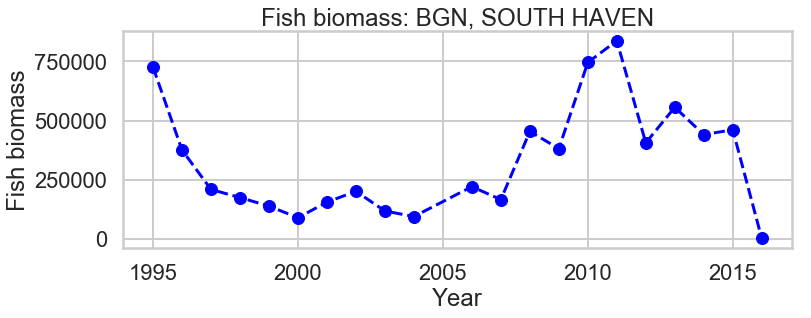

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(12,5))
plt.plot(Total_biomas_yr_wise_BGN_SOUTH_HAVEN, '--o', c='b')
plt.xlabel('Year')
plt.title('Fish biomass: BGN, SOUTH HAVEN')
plt.ylabel('Fish biomass')
plt.show()

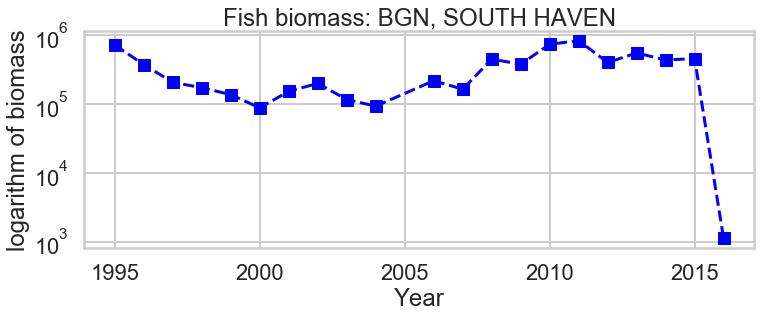

In [46]:
plt.figure(figsize=(12,6))
plt.plot(Total_biomas_yr_wise_BGN_SOUTH_HAVEN, '--s', c='b')
plt.xlabel('Year')
plt.ylabel('logarithm of biomass')
plt.yscale('log')
plt.title('Fish biomass: BGN, SOUTH HAVEN')
plt.show()